<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Shadi Nakhla

GUC-ID:43-0411

Elective Tutorial No.:T-01

**Member 2**

Name:Karim Ebrahim

GUC-ID:43-0414

Elective Tutorial No.:T-01

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [ ]:
!unzip Data.zip

Archive:  Data.zip
replace Data/test/airplane/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def fillMatrixNormalized (type):
  matrix = np.array([plt.imread('Data/train/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,5000)]) 
  matrix = np.true_divide(matrix, 255)
  return(matrix)
def test (type):
  matrix = np.array([plt.imread('Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
  matrix = np.true_divide(matrix, 255)
  return(matrix)
def meanCalculator (matrix):
  return(np.transpose(matrix.mean(axis=0).reshape(-1,1)))
def varianceCalculator (matrix):
  return (np.transpose(matrix.var(axis=0).reshape(-1,1)))
filledMatrixA = (fillMatrixNormalized("airplane"))
filledMatrixF = (fillMatrixNormalized("frog"))
filledMatrixM = (fillMatrixNormalized("automobile"))
filledMatrixATest = (test("airplane"))
filledMatrixFTest = (test("frog"))
filledMatrixMTest = (test("automobile"))
MeanAirplane=np.mean(filledMatrixA,axis=0)
MeanAuto=np.mean(filledMatrixM,axis=0)
MeanFrog=np.mean(filledMatrixF,axis=0)
varAirplane=np.var(filledMatrixA,axis=0)
varAuto=np.var(filledMatrixM,axis=0)
varFrog=np.var(filledMatrixF,axis=0)
Test_X=np.concatenate((filledMatrixATest, filledMatrixMTest), axis=0)
Test_X = np.concatenate((Test_X, filledMatrixFTest), axis=0)










<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
def naiveBayes(arr, test):
    mean = arr.mean(axis=0) 
    variance = arr.var(axis=0) 
    probabilities = []
    for image in test: 
        pixels_prob = (1 / np.sqrt(2*np.pi*variance) ) * np.exp( (-(image - mean)**2)  / ( 2*variance ) )
        probabilities.append(np.prod(pixels_prob))
    return np.array(probabilities).reshape((3000,1))
    
def classifier (arr):
  airCounter=0
  frogCounter=0
  automobileCounter=0
  confusion_matrix_nb_32 = [[],[],[]]
  for i in range(0,1000):
    if (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][0]):
      airCounter = airCounter + 1
    elif (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][1]):
      frogCounter+=1
    else:
      automobileCounter+=1
  confusion_matrix_nb_32[0]=[airCounter,frogCounter,automobileCounter]
  airCounter=0
  frogCounter=0
  automobileCounter=0
  for i in range(1000,2000):
    if (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][0]):
      airCounter = airCounter + 1
    elif (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][1]):
      frogCounter+=1
    else:
      automobileCounter+=1
  confusion_matrix_nb_32[1]=[airCounter,frogCounter,automobileCounter]
  airCounter=0
  frogCounter=0
  automobileCounter=0
  for i in range(2000,3000):
    if (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][0]):
      airCounter = airCounter + 1
    elif (max(arr[i][0],arr[i][1],arr[i][2])==arr[i][1]):
      frogCounter+=1
    else:
      automobileCounter+=1
  confusion_matrix_nb_32[2]=[airCounter,frogCounter,automobileCounter]
  airCounter=0
  frogCounter=0
  automobileCounter=0
  return confusion_matrix_nb_32



In [ ]:
allNaive=np.concatenate((naiveBayes(filledMatrixA,Test_X),naiveBayes(filledMatrixM,Test_X)), axis=1)
allNaive=np.concatenate((allNaive,naiveBayes(filledMatrixF,Test_X)),axis=1)
confusion_matrix32nb = classifier(allNaive)
confusion_matrix32nb=np.matrix(classifier(allNaive))



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


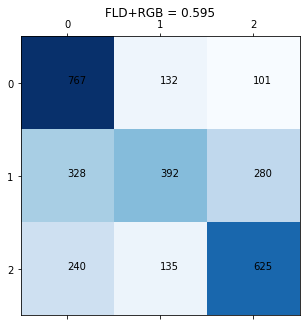

In [ ]:
accuracy = np.diag(confusion_matrix32).sum()/allNaive.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix32,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix32.shape[0]):
    for j in range(0,confusion_matrix32.shape[1]):
        plt.annotate(confusion_matrix32[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
N = 5000/15000
S1 = ((filledMatrixA - MeanAirplane).T @ (filledMatrixA - MeanAirplane))
S2 = ((filledMatrixM - MeanAuto).T @ (filledMatrixM - MeanAuto))
S3 = ((filledMatrixF - MeanFrog).T @ (filledMatrixF - MeanFrog))
S1.shape
covariance = N * (S1 + S2 + S3)
invCov = np.linalg.pinv(covariance)
probgAir = np.zeros((3000,1))
for i in range(0,3000):
    temp = Test_X[i].reshape(-1,1).T - MeanAirplane.reshape(-1,1).T
    pgAir = (temp @ invCov @ temp.T) 
    probgAir[i] = np.exp((pgAir* -0.5))
  
probgCar = np.zeros((3000,1))
for i in range(0,3000):
    temp = Test_X[i].reshape(-1,1).T - MeanAuto.reshape(-1,1).T
    pgCar = (temp @ invCov @ temp.T) 
    probgCar[i] = np.exp((pgCar* -0.5))
    
probgFrog = np.zeros((3000,1))
for i in range(0,3000):
    temp = Test_X[i].reshape(-1,1).T - MeanFrog.reshape(-1,1).T
    pgFrog = (temp @ invCov @ temp.T) 
    probgFrog[i] = np.exp((pgFrog* -0.5))
    



In [ ]:
gaussianTest = np.concatenate((probgAir,probgCar,probgFrog), axis=1)
confusion_matrix32gm = classifier(gaussianTest)
confusion_matrix32gm = np.matrix(classifier(gaussianTest))
print(confusion_matrix32gm)


[[763 147  90]
 [200 656 144]
 [ 76 141 783]]


In [ ]:
gaussianTest16gm = np.concatenate((probgAir,probgCar,probgFrog), axis=1)
confusion_matrix16gm = classifier(gaussianTest16gm)
confusion_matrix16gm = np.matrix(classifier(gaussianTest16gm))
print(confusion_matrix16gm)


[[795 119  86]
 [165 712 123]
 [ 64 104 832]]


In [ ]:
gaussianTest8gm = np.concatenate((probgAir,probgCar,probgFrog), axis=1)
confusion_matrix8gm = classifier(gaussianTest8gm)
confusion_matrix8gm = np.matrix(classifier(gaussianTest8gm))
print(confusion_matrix8gm)


[[789 126  85]
 [175 705 120]
 [ 57 103 840]]


In [ ]:
gaussianTest4gm = np.concatenate((probgAir,probgCar,probgFrog), axis=1)
confusion_matrix4gm = classifier(gaussianTest4gm)
confusion_matrix4gm = np.matrix(classifier(gaussianTest4gm))
print(confusion_matrix4gm)


[[780 151  69]
 [199 682 119]
 [ 53 120 827]]


In [ ]:
confusion_matrices_gm = [confusion_matrix32gm,confusion_matrix16gm, confusion_matrix8gm, confusion_matrix4gm]

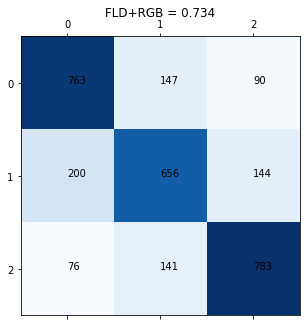

In [ ]:
accuracy = np.diag(confusion_matrix32).sum()/gaussianTest.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix32,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix32.shape[0]):
    for j in range(0,confusion_matrix32.shape[1]):
        plt.annotate(confusion_matrix32[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [ ]:
#confusion_matrices = confusion_matrices_nb + confusion_matrices_gm
filledMatrixA16 = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest16 = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM16 = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest16 = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF16 = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest16 = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

Test_X16=np.concatenate((filledMatrixATest16, filledMatrixMTest16), axis=0)
Test_X16 = np.concatenate((Test_X16, filledMatrixFTest16), axis=0)

In [ ]:

filledMatrixA8 = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest8 = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM8 = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest8 = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF8 = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest8 = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

Test_X8=np.concatenate((filledMatrixATest8, filledMatrixMTest8), axis=0)
Test_X8 = np.concatenate((Test_X8, filledMatrixFTest8), axis=0)

In [ ]:

filledMatrixA4 = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest4 = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM4 = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest4 = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF4 = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest4 = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255
Test_X4=np.concatenate((filledMatrixATest4, filledMatrixMTest4), axis=0)
Test_X4 = np.concatenate((Test_X4, filledMatrixFTest4), axis=0)

In [ ]:
allNaive16=np.concatenate((naiveBayes(filledMatrixA16,Test_X16),naiveBayes(filledMatrixM16,Test_X16)), axis=1)
allNaive16=np.concatenate((allNaive16,naiveBayes(filledMatrixF16,Test_X16)),axis=1)
confusion_matrix16nb = classifier(allNaive16)
confusion_matrix16nb=np.matrix(classifier(allNaive16))
print(confusion_matrix16nb)


[[723 131 146]
 [255 429 316]
 [170  53 777]]


In [ ]:
allNaive8=np.concatenate((naiveBayes(filledMatrixA8,Test_X8),naiveBayes(filledMatrixM8,Test_X8)), axis=1)
allNaive8=np.concatenate((allNaive8,naiveBayes(filledMatrixF8,Test_X8)),axis=1)
confusion_matrix8nb = classifier(allNaive8)
confusion_matrix8nb = np.matrix(classifier(allNaive8))
print(confusion_matrix8nb)


[[713 146 141]
 [254 420 326]
 [165  56 779]]


In [ ]:
allNaive4=np.concatenate((naiveBayes(filledMatrixA4,Test_X4),naiveBayes(filledMatrixM4,Test_X4)), axis=1)
allNaive4=np.concatenate((allNaive4,naiveBayes(filledMatrixF4,Test_X4)),axis=1)
confusion_matrix4nb = classifier(allNaive4)
confusion_matrix4nb = np.matrix(classifier(allNaive4))
print(confusion_matrix4nb)


[[681 182 137]
 [256 381 363]
 [164  61 775]]


In [ ]:
confusion_matrices_nb = [confusion_matrix32nb,confusion_matrix16nb, confusion_matrix8nb, confusion_matrix4nb]

In [ ]:
#confusion_matrices = confusion_matrices_nb + confusion_matrices_gm
filledMatrixA = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(16,16),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255
MeanAirplane=np.mean(filledMatrixA,axis=0)
MeanAuto=np.mean(filledMatrixM,axis=0)
MeanFrog=np.mean(filledMatrixF,axis=0)
varAirplane=np.var(filledMatrixA,axis=0)
varAuto=np.var(filledMatrixM,axis=0)
varFrog=np.var(filledMatrixF,axis=0)
Test_X=np.concatenate((filledMatrixATest, filledMatrixMTest), axis=0)
Test_X = np.concatenate((Test_X, filledMatrixFTest), axis=0)

In [ ]:
#confusion_matrices = confusion_matrices_nb + confusion_matrices_gm
filledMatrixA = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(8,8),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255
MeanAirplane=np.mean(filledMatrixA,axis=0)
MeanAuto=np.mean(filledMatrixM,axis=0)
MeanFrog=np.mean(filledMatrixF,axis=0)
varAirplane=np.var(filledMatrixA,axis=0)
varAuto=np.var(filledMatrixM,axis=0)
varFrog=np.var(filledMatrixF,axis=0)
Test_X=np.concatenate((filledMatrixATest, filledMatrixMTest), axis=0)
Test_X = np.concatenate((Test_X, filledMatrixFTest), axis=0)

In [ ]:
#confusion_matrices = confusion_matrices_nb + confusion_matrices_gm
filledMatrixA = np.array([(cv2.resize(cv2.imread('Data/train/airplane/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixATest = np.array([(cv2.resize(cv2.imread('Data/test/airplane/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixM = np.array([(cv2.resize(cv2.imread('Data/train/automobile/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixMTest = np.array([(cv2.resize(cv2.imread('Data/test/automobile/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255

filledMatrixF = np.array([(cv2.resize(cv2.imread('Data/train/frog/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,5000)])/255
filledMatrixFTest = np.array([(cv2.resize(cv2.imread('Data/test/frog/'+str(i)+'.jpg'),(4,4),interpolation=cv2.INTER_AREA)).reshape(-1) for i in range (0,1000)])/255
MeanAirplane=np.mean(filledMatrixA,axis=0)
MeanAuto=np.mean(filledMatrixM,axis=0)
MeanFrog=np.mean(filledMatrixF,axis=0)
varAirplane=np.var(filledMatrixA,axis=0)
varAuto=np.var(filledMatrixM,axis=0)
varFrog=np.var(filledMatrixF,axis=0)
Test_X=np.concatenate((filledMatrixATest, filledMatrixMTest), axis=0)
Test_X = np.concatenate((Test_X, filledMatrixFTest), axis=0)

In [ ]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


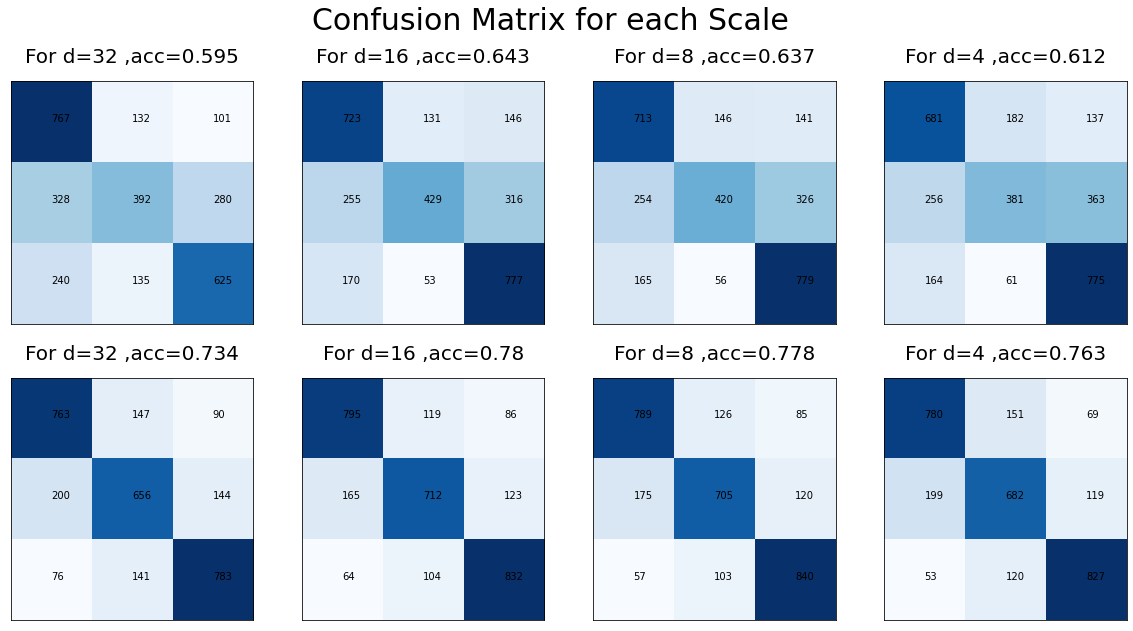

In [ ]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

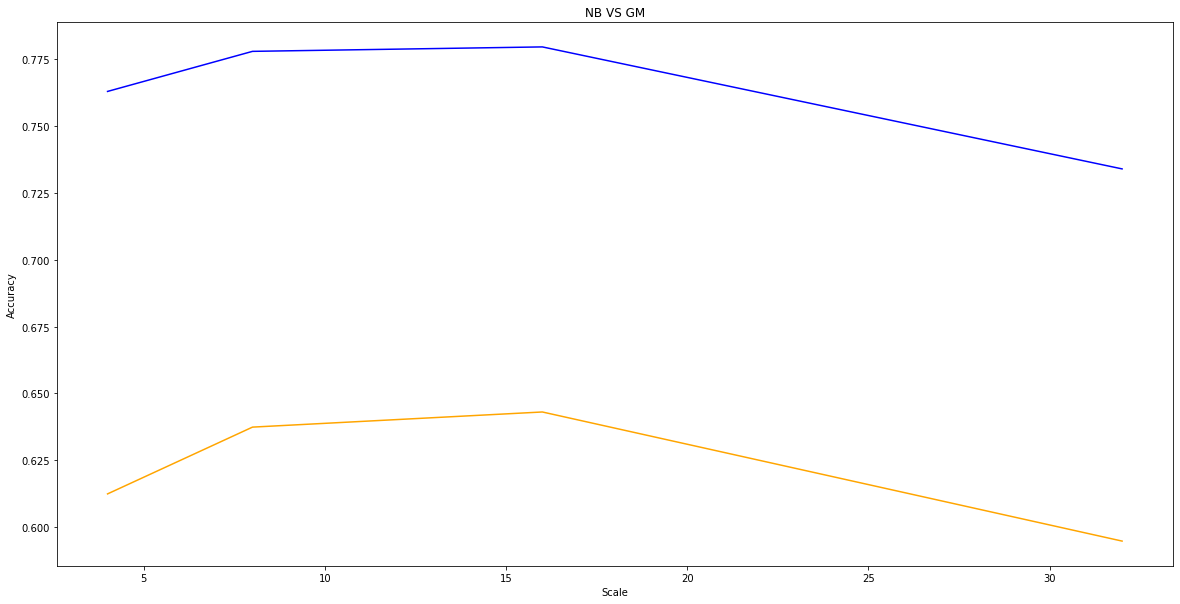

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

 
As apparent on the final graph, the Gaussian method is much more accurate than the naive Baye's method. The reason for this result is that the Baye's method assumes that the features that differentiates the classes from each other are independant, however, this assumption is not realistic therefore resulting in lower accuracy when compared with the Gaussian method which does not use this assumption.
